In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_countries(data):
    fig = plt.figure(figsize=(16, 4))
    sns.set_theme(style="darkgrid")
    sns.lineplot(data=data, y='ALL_INF', x = 'SDATE', hue='Country', legend=False)
    plt.show()

Load the data

In [2]:
df = pd.read_csv('influenza_weekly.csv', low_memory=False)
df['SDATE'] = pd.to_datetime(df['SDATE'])
display(df.head())

lat_lon = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')

pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_2252106.csv', skiprows=4)

# merge pop and countries
countries = pd.merge(lat_lon[['country', 'latitude', 'longitude']], pop[['Country Name', '2011']], left_on='country', right_on='Country Name').rename(columns={'2011': 'population'})
display(countries)

,REPORT_ID,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,1048,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,5,2015-01-26,2015-02-01,43.0,43.0,...,0.0,0.0,1,0.0,3.0,0.0,3,4,NaN,Sporadic
1,1059,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,16,2015-04-13,2015-04-19,22.0,22.0,...,0.0,0.0,1,0.0,0.0,0.0,0,1,NaN,Sporadic
2,1060,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,17,2015-04-20,2015-04-26,26.0,26.0,...,0.0,0.0,1,0.0,0.0,0.0,0,1,NaN,Sporadic
3,1061,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,18,2015-04-27,2015-05-03,17.0,17.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,NaN,Sporadic
4,1062,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,19,2015-05-04,2015-05-10,23.0,23.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,NaN,Sporadic


,country,latitude,longitude,Country Name,population
0,Andorra,42.546245,1.601554,Andorra,83747.0
1,United Arab Emirates,23.424076,53.847818,United Arab Emirates,8946777.0
2,Afghanistan,33.939110,67.709953,Afghanistan,30117413.0
3,Antigua and Barbuda,17.060816,-61.796428,Antigua and Barbuda,89253.0
4,Albania,41.153332,20.168331,Albania,2905195.0
...,...,...,...,...,...
177,Samoa,-13.759029,-172.104629,Samoa,187469.0
178,Kosovo,42.602636,20.902977,Kosovo,1791000.0
179,South Africa,-30.559482,22.937506,South Africa,52004172.0
180,Zambia,-13.133897,27.849332,Zambia,14023193.0


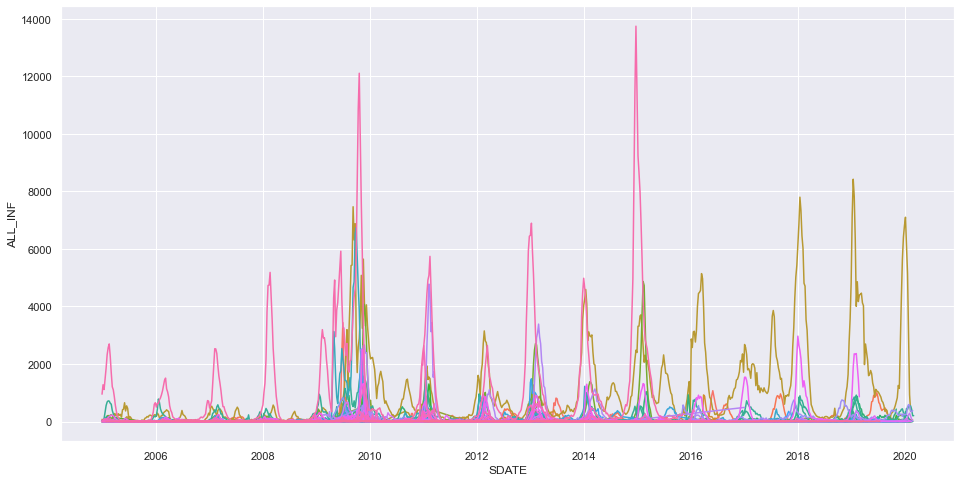

In [3]:
plot_countries(df)

In [4]:
# Find a year with lots of data to just work on that later
df.groupby('Year').count().sort_values('REPORT_ID', ascending=False).head(5)

,REPORT_ID,Country,WHOREGION,FLUREGION,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
Year,,,,,,,,,,,,,,,,,,,,,
2012,3999,3999,3999,3999,3999,3999,3999,2467,3908,3999,...,2588,3998,3999,3999,3999,3999,3999,3999,360,3999
2011,3892,3892,3892,3892,3892,3892,3892,2385,3813,3892,...,2518,3892,3892,3892,3892,3892,3892,3892,411,3892
2013,3873,3873,3873,3873,3873,3873,3873,2343,3788,3873,...,2453,3873,3873,3873,3873,3873,3873,3873,253,3873
2010,3553,3553,3553,3553,3553,3553,3553,2537,3457,3553,...,2664,3553,3553,3502,3502,3553,3553,3553,466,3553
2014,3113,3113,3113,3113,3113,3113,3113,2268,3038,3113,...,2379,3113,3113,3113,3113,3113,3113,3113,238,3113


In [97]:
# Filter to single flu season
# 2011-2012 and
# Filter to Europe only
# df3 = df[(df['SDATE']>'2011-11-01')&(df['SDATE']<'2012-10-31')&(df['WHOREGION']=='European Region of WHO')].sort_values(['SDATE', 'Country'])
df3 = df[(df['SDATE']>'2011-11-01')&(df['SDATE']<'2012-10-31')].sort_values(['SDATE', 'Country'])

Add lat/lon of countries

In [98]:
display(set(df3.Country.unique())-set(countries.country.unique()))

missing_countries = {'Czechia':'Czech Republic',
 'Republic of Moldova': 'Moldova',
 'Russian Federation': 'Russia',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}

df4 = df3.replace({'Country': missing_countries})
df4.head()

{'Congo',
 'Czechia',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Egypt',
 'Iran (Islamic Republic of)',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Republic of Moldova',
 'Russian Federation',
 'Slovakia',
 'Syrian Arab Republic',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America',
 'Viet Nam'}

,REPORT_ID,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
62,2194,Albania,European Region of WHO,South West Europe,2011,45,2011-11-07,2011-11-13,NaN,0.0,...,NaN,0.0,0,0.0,0.0,0.0,0,0,NaN,No Activity
592,4822,Angola,African Region of WHO,Middle Africa,2011,45,2011-11-07,2011-11-13,7.0,7.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,NaN,No Activity
985,8764,Argentina,Region of the Americas of WHO,Temperate South America,2011,45,2011-11-07,2011-11-13,NaN,827.0,...,0.0,2.0,2,0.0,0.0,0.0,0,2,825,Regional Outbreak
1727,12706,Australia,Western Pacific Region of WHO,Oceania Melanesia Polynesia,2011,45,2011-11-07,2011-11-13,373.0,373.0,...,0.0,0.0,18,0.0,0.0,2.0,2,20,NaN,Sporadic
2166,14020,Austria,European Region of WHO,South West Europe,2011,45,2011-11-07,2011-11-13,NaN,39.0,...,NaN,0.0,0,0.0,0.0,0.0,0,0,NaN,No Activity


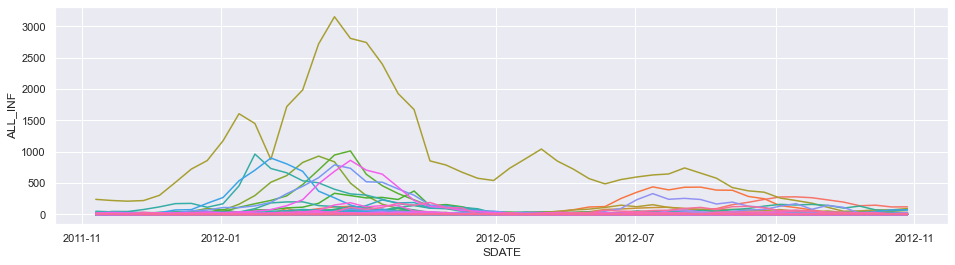

In [99]:
df5 = pd.merge(countries[['country', 'latitude', 'longitude', 'population']], df4, left_on='country', right_on='Country')
plot_countries(df5)

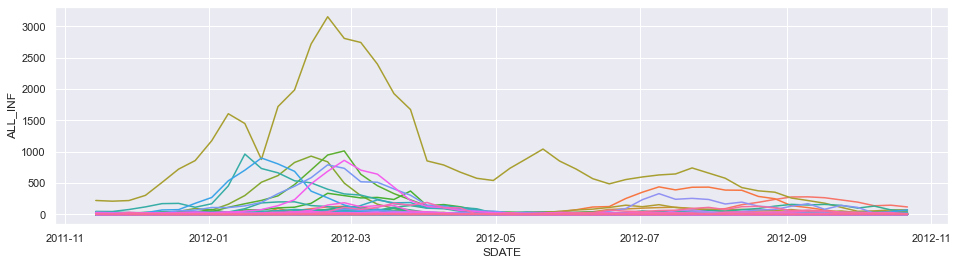

In [100]:
# Let's move those date ranges to remove the flu free regions and show all of the flu region for this 'season'
df6 = (df5.groupby('SDATE').sum()['ALL_INF']>100)
flu_dates = df6.index[df6==True]
df7 = df5[(df5['SDATE']> min(flu_dates))&(df5['SDATE']< max(flu_dates))]
plot_countries(df7)

In [101]:
# Let's look at latitudes
from folium import Map, Marker, Icon
m = Map(location=[53,-6.2], zoom_start=3)

In [119]:
unique_countries = df7[['country', 'latitude', 'longitude']].drop_duplicates()

unique_countries['abs_lat'] = abs(unique_countries['latitude'])
lat_sorted = unique_countries.sort_values('abs_lat')

bottom = lat_sorted.iloc[:len(lat_sorted)//3]
middle = lat_sorted.iloc[len(lat_sorted)//3: int(len(lat_sorted)//1.5)]
top = lat_sorted.iloc[int(len(lat_sorted)//1.5):]

bands = [bottom, middle,top]

colours = {0:'red', 1: 'blue', 2: 'green'}
for i, band in enumerate(bands):
    for country in band.itertuples():
        Marker([country.latitude, country.longitude], popup=country.country, icon=Icon(color=colours[i])).add_to(m)
m

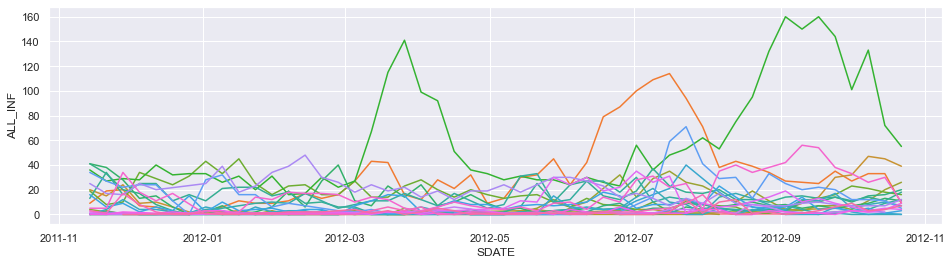

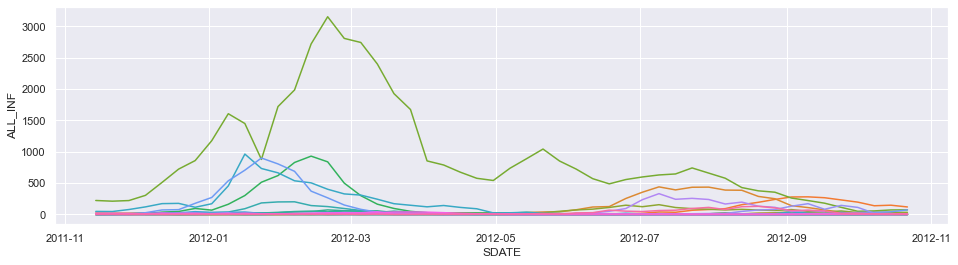

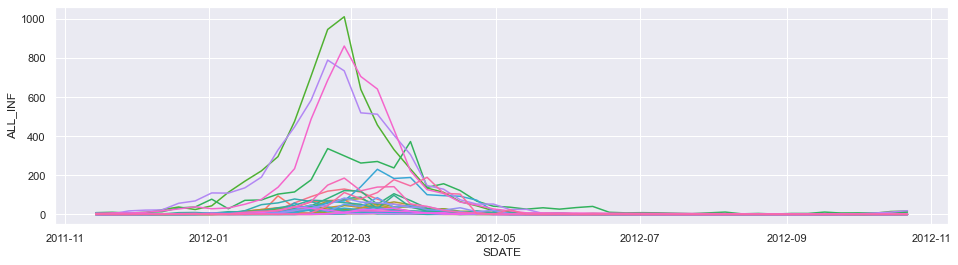

In [118]:
for band in bands:
    plot_countries(pd.merge(df7, band, left_on='country', right_on= 'country'))